### Хайкова Светлана
4.1.25, 4.2, 4.4.13, 4.9.7

# Задача 4.1.
Дана система уравнений Ax=b. Найти решение системы с помощью метода Гаусса. Выполнить 10 итераций по методу Зейделя. Принимая решение, полученное с помощью метода Гаусса за точное, найти величину абсолютной погрешности итерационного решения.

ПОРЯДОК РЕШЕНИЯ ЗАДАЧИ:
    
1. Задать матрицу системы A и вектор правой части b. Используя встроенную результаты выполнения лабораторной работы 3, либо стандартные библиотечные функции (функцию lsolve пакета MATHCAD, numpy.linalg.solve, либо аналогичные им), найти решение системы Ax=b с помощью метода Гаусса.

2. Преобразовать систему Ax=b к виду x=Bx+c, удобному для итераций. Проверить выполнение достаточногоусловиясходимостиитерационныхметодов $||B||_{∞}<1$.

3. Программно реализовать метод Зейделя решения системы линейных уравнений. Предусмотреть два критерия остановки итерационного процесса: а) по максимальному числу итераций и б) по достижению заданной точности ε.
    
4. Выполнить 10 итераций по методу Зейделя; взять любое начальное приближение. Принимая решение, полученное в п. 1 за точное, найти величину абсолютной погрешности итерационного решения
(использовать норму $|| ⋅ ||_∞$ ).

5. Взять другое начальное приближение. Объяснить полученные результаты.

In [2]:
import numpy as np
import scipy.linalg as sp
import matplotlib.pyplot as plt
import numpy.linalg as npl
import numpy.random as npr

In [3]:
A = np.array([[49.5, 12.52, 16.12, 19.80], 
             [0., 27.1, 1.64, 23.76],
             [12.87, 11.52, 40, -14.85],
             [0, 4.32, 0.12, 6.27]])
b = np.array([-51.176, 101.46, -178.846, 14.084])

In [6]:
x = npl.solve(A, b)
x

array([ 0.25252525,  5.2       , -6.5       , -1.21212121])

In [5]:
def convertJacobiView(A, b):
    D = np.diag(A)
    B = ((-1. / D) * (A - np.diag(D)).T).T
    c = b / D
    return B, c

In [7]:
B, c = convertJacobiView(A, b)
print npl.norm(B, ord = np.inf)

0.9810000000000001


In [8]:
np.allclose(B.dot(x) + c, x)

True

In [9]:
def Jacobi(B, c, x0, maxiter = int(1e6), eps = 1e-9):
    if npl.norm(B, ord = np.inf) >= 1:
        print 'Норма матрицы B не соответствует достаточному условию сходимости'
    norm = np.linalg.norm(B, ord = np.inf)
    eps *= (1 - norm) / norm; i = 0
    while i < maxiter and npl.norm(x0 - (B.dot(x0) + c), ord = np.inf) > eps:
        x0 = B.dot(x0) + c
        i += 1
    return x0, i

x0 = np.zeros(b.shape[0])
x_Jac, iter_Jac = Jacobi(B, c, x0)
print 'Решение полученное методом Якоби: ', x_Jac
print 'Затраченное число итераций: ', iter_Jac
np.allclose(x_Jac, x)

Решение полученное методом Якоби:  [ 0.25252525  5.2        -6.5        -1.21212121]
Затраченное число итераций:  111


True

In [10]:
from scipy.linalg import solve_triangular

In [11]:
def convertSeidelView(A, b):
    L = np.tril(A, -1)
    D = np.diag(np.diag(A))
    U = np.triu(A, 1)
    DLinv = solve_triangular(D + L, np.eye(A.shape[0]), lower=True)

    B = -DLinv.dot(U)
    c = DLinv.dot(b)
    return B, c

In [12]:
B, c = convertSeidelView(A, b); 
np.allclose(x, c + B.dot(x))

True

In [13]:
def Seidel(B, c, x0, maxiter = int(1e5), eps = 1e-9):
    i = 0
    if npl.norm(B, ord = np.inf) >= 1:
        print 'Норма матрицы B не соответствует достаточному условию сходимости'
    while i < maxiter and npl.norm(x0 - (B.dot(x0) + c), ord = np.inf) > eps:
        x0 = B.dot(x0) + c
        i += 1
    return x0, i


x0 = np.zeros(b.shape[0])
x_Sei, iter_Sei = Seidel(B, c, x0)
print 'Решение полученное методом Зейделя: ', x_Sei
print 'Затраченное число итераций: ', iter_Sei
np.allclose(x_Sei, x)

Решение полученное методом Зейделя:  [ 0.25252525  5.2        -6.5        -1.21212121]
Затраченное число итераций:  46


True

In [14]:
for sample in range(10):
    x0 = npr.rand(x.shape[0]) * 10
    x_Sei, iter_Sei = Seidel(B, c, x0, 10)
    print 'Абсолютная погрешность метода Зейделя на семпле', sample, '=', npl.norm(x - x_Sei, ord = np.inf)

Абсолютная погрешность метода Зейделя на семпле 0 = 0.0424706833975792
Абсолютная погрешность метода Зейделя на семпле 1 = 0.1301501578521007
Абсолютная погрешность метода Зейделя на семпле 2 = 0.05798228286303431
Абсолютная погрешность метода Зейделя на семпле 3 = 0.1621240208067034
Абсолютная погрешность метода Зейделя на семпле 4 = 0.10710524436315083
Абсолютная погрешность метода Зейделя на семпле 5 = 0.18550289035765832
Абсолютная погрешность метода Зейделя на семпле 6 = 0.12177832444051617
Абсолютная погрешность метода Зейделя на семпле 7 = 0.09501260683518353
Абсолютная погрешность метода Зейделя на семпле 8 = 0.17300332421685294
Абсолютная погрешность метода Зейделя на семпле 9 = 0.10092388614398828


# Задача 4.2
Для системы уравнений $Ax=b$ из задачи 4.1 найти решение по методу Зейделя с точностью $ε= 10^{−6}$ , взяв любое начальное приближение. Предусмотреть подсчет количества итераций, потребовавшихся для достижения точности $ε$.



In [15]:
for sample in range(5):
    x0 = npr.rand(x.shape[0]) * 10
    x_Sei, iter_Sei = Seidel(B, c, x0, eps = 1e-6)
    print 'Начальное приближение метода на семпле', sample, '=', x0
    print 'Число итераций =', iter_Sei
    print 'Абсолютная погрешность метода Зейделя =', npl.norm(x - x_Sei, ord = np.inf)

Начальное приближение метода на семпле 0 = [3.53303258 0.02197045 6.09937418 4.80634654]
Число итераций = 34
Абсолютная погрешность метода Зейделя = 2.447022323437409e-06
Начальное приближение метода на семпле 1 = [8.31236571 2.72798131 7.71076358 9.08812322]
Число итераций = 35
Абсолютная погрешность метода Зейделя = 2.5656245394856114e-06
Начальное приближение метода на семпле 2 = [0.5365363  1.58288903 2.26233533 5.2355675 ]
Число итераций = 34
Абсолютная погрешность метода Зейделя = 2.500664599836e-06
Начальное приближение метода на семпле 3 = [5.775765   4.95859126 4.54691884 1.88681902]
Число итераций = 33
Абсолютная погрешность метода Зейделя = 2.1674161914120305e-06
Начальное приближение метода на семпле 4 = [6.52006048 1.97930131 9.54737283 1.08007211]
Число итераций = 33
Абсолютная погрешность метода Зейделя = 1.9179563022220236e-06


# Задача 4.4.13

Дана система уравнений $x=Bx+c$, где $B=B(t)$, $t = −1,−0.8,...,0.8,1$ - параметр. Построить график (или гистограмму) зависимости нормы $|| B ||_∞$ от параметра $t$. По графику определить, при каких перечисленных выше значениях $t$ выполнено достаточное условие сходимости итерационных методов. Найти решение системы $x=Bx+c$ с точностью $ε =10^{−5}$ для наибольшего значения параметра $t$, при котором выполнено условие сходимости.

In [16]:
def B(t):
    return np.array([[np.sin(t), 0.15, 0.1, 0.3],
                     [0.1, 0.11, 0.4, -0.05],
                    [0.3, 0.1, 0.2, 0.1],
                    [0.2, -0.12, 0.1, np.sin(5 * t)]])
c = np.array([0, 1, 2, 3])
param_grid = np.arange(-1, 1.1, 0.2)
normB_grid = [npl.norm(B(t), ord = np.inf) for t in param_grid]

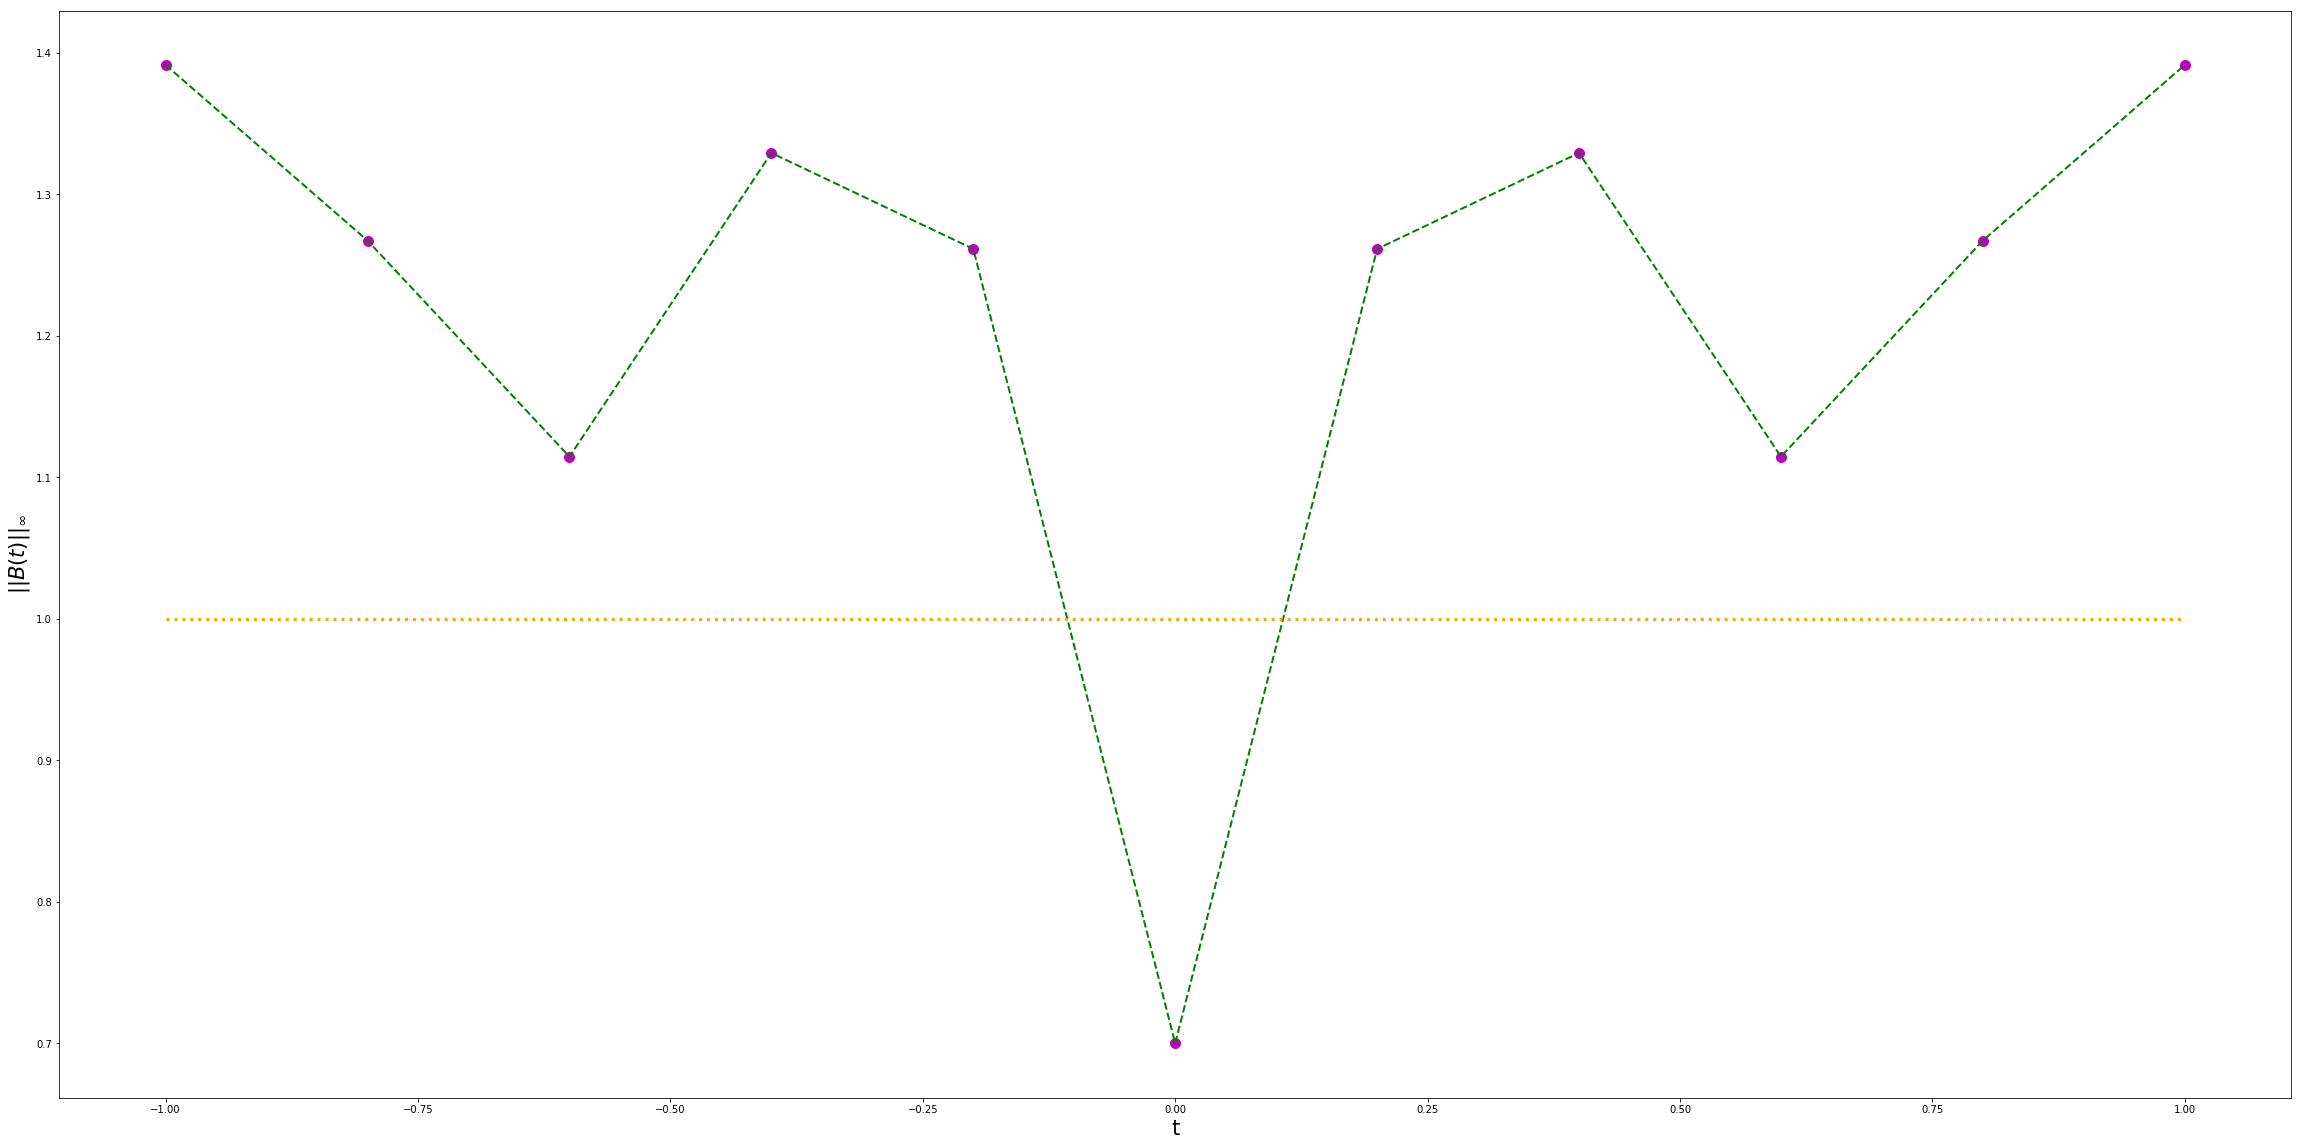

In [17]:
plt.figure(figsize = (40, 20))
plt.plot(param_grid, normB_grid, lw = 2, ls = '--', c = 'g')
plt.scatter(param_grid, normB_grid, s = 100, c = 'm')
plt.plot(param_grid, np.ones(param_grid.shape), lw = 3, ls = ':', c = 'orange')
plt.xlabel(u't', fontsize = 21)
plt.ylabel(u"$||B(t)||_∞$", fontsize = 21)
plt.show()

# Задача 4.9.7
Дана система уравнений $Ax=b$ , где A – симметричная положительно определенная матрица размерности $n х n$. Найти решение системы с помощью итерационного метода со спектрально эквивалентным оператором.

n = 80

На главной диагонали элементы равны 700, на четвертой
наддиагонали элементы равны 150, на 6 наддиагонали равны 20.

$b_i =1000⋅ln(i)$

In [18]:
n = 80
A = 700 * np.eye(n, n) + 150 * np.eye(n, n, k = 4) + 20 * np.eye(n, n, k = 6) 
b = np.array([1000 * np.log(i) for i in range(1, n + 1)])
A[:7, :7], b[:7]

(array([[700.,   0.,   0.,   0., 150.,   0.,  20.],
        [  0., 700.,   0.,   0.,   0., 150.,   0.],
        [  0.,   0., 700.,   0.,   0.,   0., 150.],
        [  0.,   0.,   0., 700.,   0.,   0.,   0.],
        [  0.,   0.,   0.,   0., 700.,   0.,   0.],
        [  0.,   0.,   0.,   0.,   0., 700.,   0.],
        [  0.,   0.,   0.,   0.,   0.,   0., 700.]]),
 array([   0.        ,  693.14718056, 1098.61228867, 1386.29436112,
        1609.43791243, 1791.75946923, 1945.91014906]))

In [19]:
def Iter(A, b, x0, eps=1e-9):
    '''Решает систему Ax=b итерационным методом.'''
    P = np.diag(A) * np.eye(n) + np.tril(A,-1)
    x = x0
    for i in range(int(1e5)):
        r = b - A.dot(x)
        z = sp.solve_triangular(P, r, lower=True)
        if np.linalg.norm(x + z - x, ord=np.inf) < eps:
            return x + z
        x = x + z
    return x

In [20]:
x0 = np.array([1] * n)
x_pred = Iter(A, b, x0)

In [21]:
x_true = np.linalg.solve(A, b)
np.linalg.norm(x_pred - x_true, ord = np.inf), x_pred - x_true

(1.431921248240542e-10,
 array([ 1.39426803e-10,  1.39988909e-10,  1.42642120e-10,  1.43192125e-10,
         1.41197054e-10,  1.41717083e-10,  1.19873889e-10,  1.20297994e-10,
         7.23705540e-11,  7.26210203e-11,  2.22017960e-11,  2.22781793e-11,
        -4.44089210e-16,  8.88178420e-16,  0.00000000e+00,  4.44089210e-16,
         0.00000000e+00,  4.44089210e-16,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00, -4.44089210e-16,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  4.44089210e-16,
         0.00000000e+00, -8.88178420e-16,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00, -8.88178420e-16,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        -8.88178420e-16,  0.00000000e+00,  0.00000000e+00, -8.88